In [2]:
import numpy as np
from unc_tools import UncRegression

In [3]:
x = np.linspace(0,10,100) + np.random.uniform(low=-.05, high=.05, size= 100)
y = 5 * np.linspace(0,10,100) + 3 + np.random.uniform(low=-.05, high=.05, size= 100)

reg = UncRegression(x,y)

reg.coefs

array([4.992724561177887+/-0.005093133409098442,
       3.048930450216715+/-0.02948005518433694], dtype=object)

<Axes: >

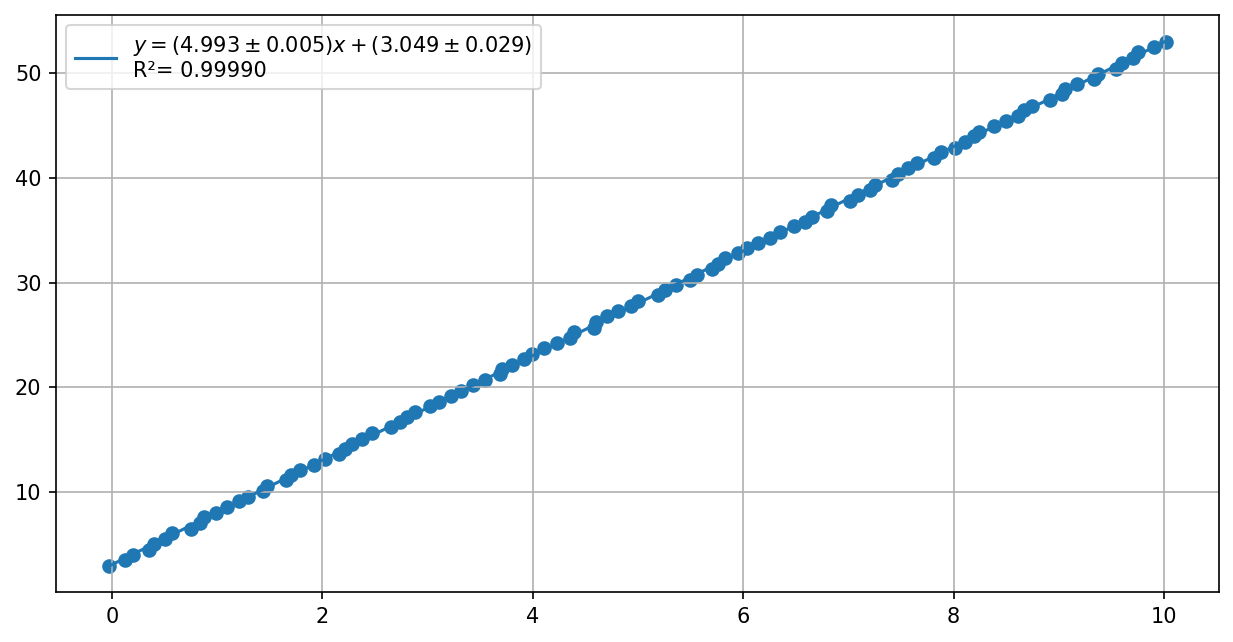

In [4]:
reg.plot()

4.401+/-0.007 4.401+/-0.008
4.40+/-0.20 4.40+/-0.20


<ErrorbarContainer object of 3 artists>

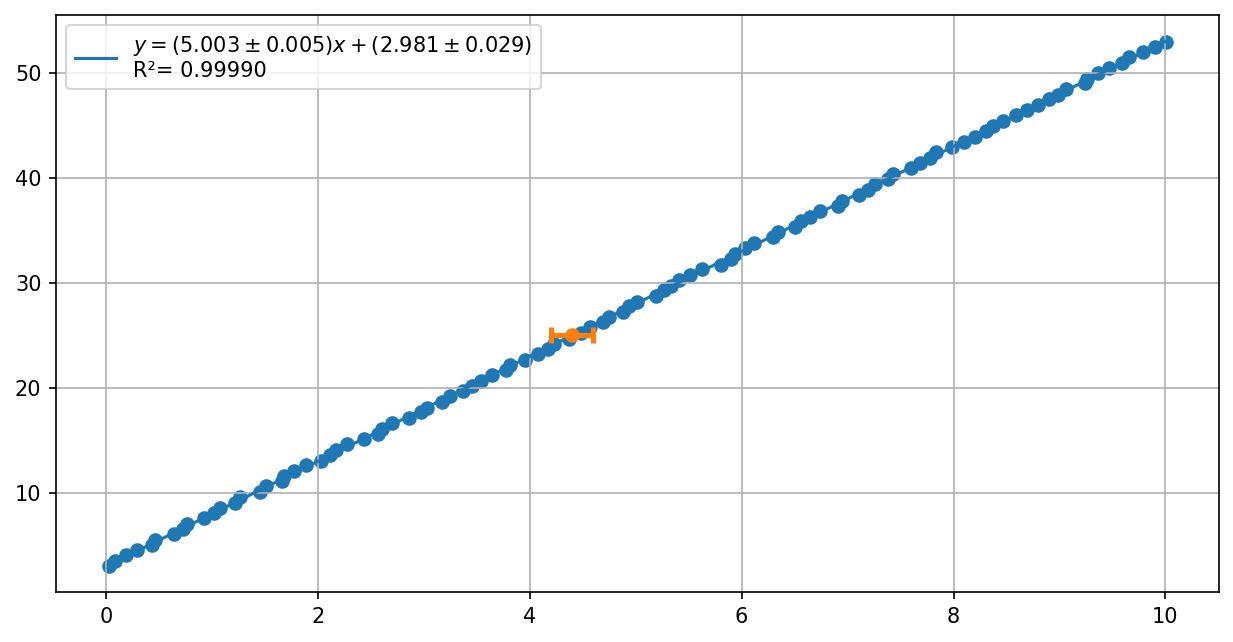

In [17]:
import uncertainties as unc
import matplotlib.pyplot as plt
import unc_tools.patches

x = np.linspace(0,10,100) + np.random.uniform(low=-.05, high=.05, size= 100)
y = 5 * np.linspace(0,10,100) + 3 + np.random.uniform(low=-.05, high=.05, size= 100)

reg = UncRegression(x,y)

y0 = 25
x0_1 = reg.find_x(y0)
x0_2 = reg.find_x(y0, x0 = 5)
print(x0_1, x0_2)


y0 = unc.ufloat(25,1)
x0_1 = reg.find_x(y0)
x0_2 = reg.find_x(y0, x0 = 5)
print(x0_1, x0_2)

ax = reg.plot()
ax.scatter(x0_1,y0)


1: analytical 5.4991656930+/-0.0083102405, numerical 5.4991656930+/-0.0079611375
2: analytical 5.4991656930+/-0.0263034730, numerical 5.4991656930+/-0.0261952731
3: analytical 5.4991656930+/-0.0263034730, numerical 5.4991656930+/-0.0564463669


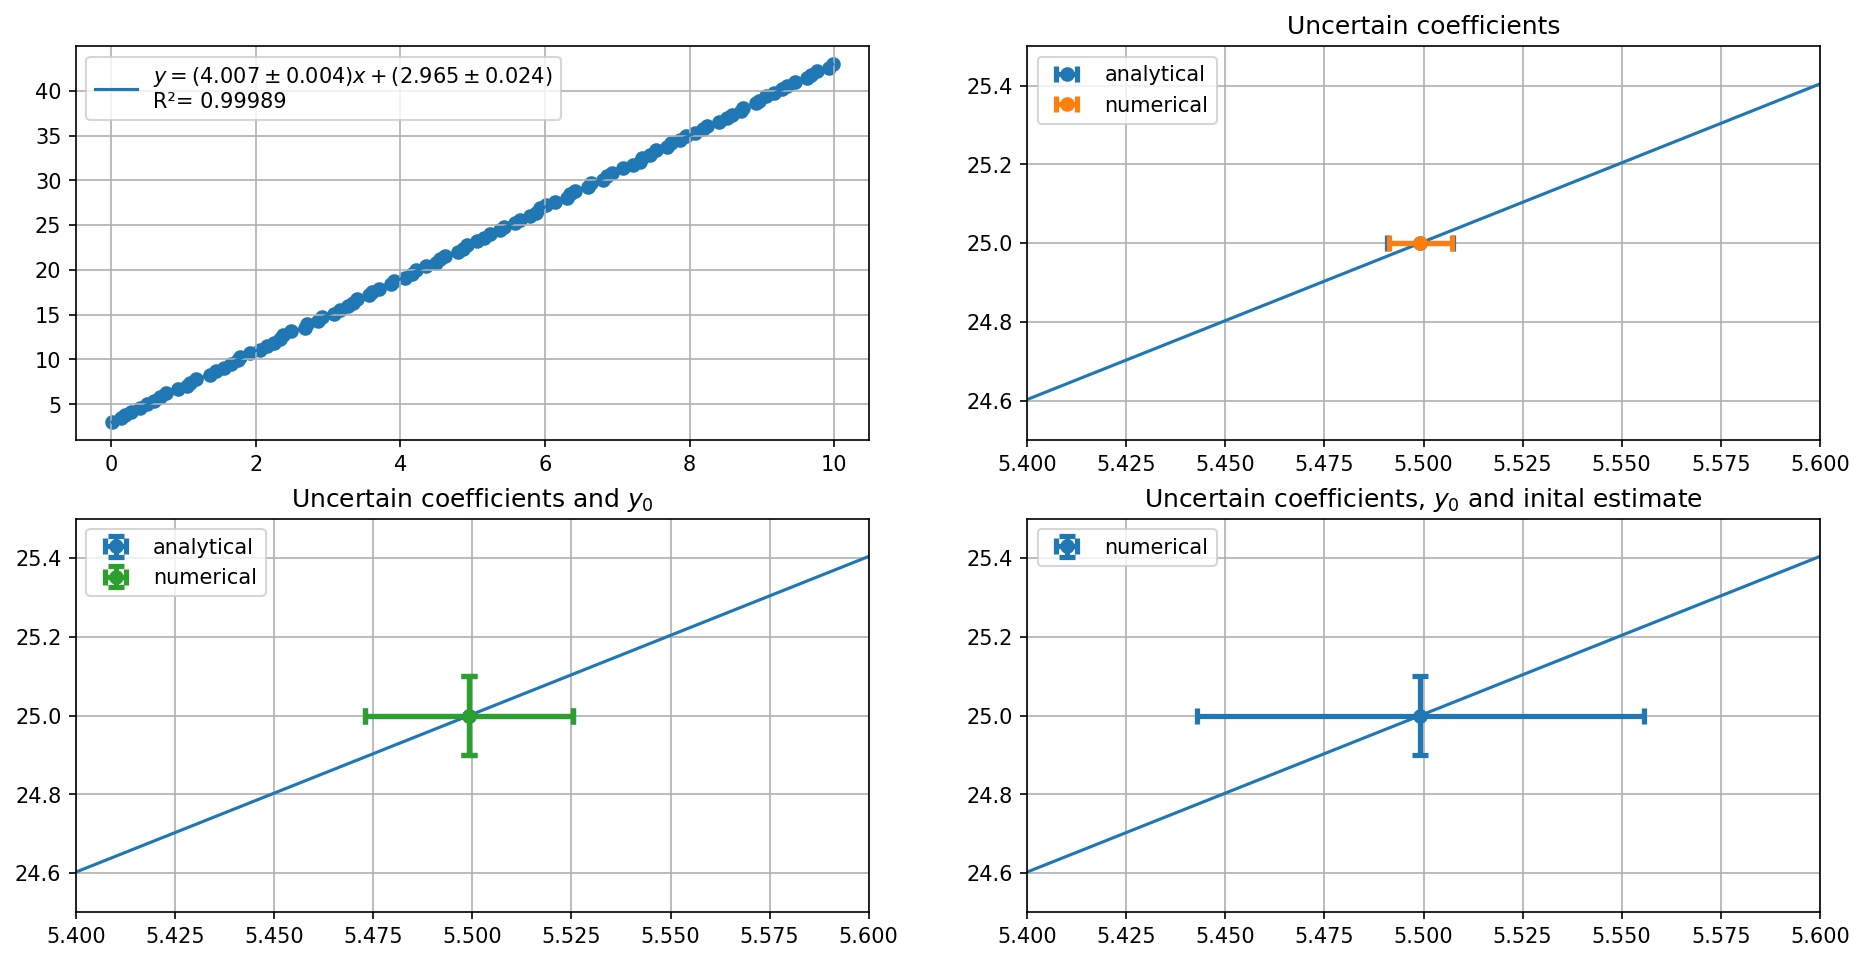

In [18]:
x = np.linspace(0, 10, 100) + np.random.uniform(low=-0.05, high=0.05, size=100)
y = 4 * np.linspace(0, 10, 100) + 3 + np.random.uniform(low=-0.05, high=0.05, size=100)

reg = UncRegression(x, y)

fig, axes = plt.subplots(2,2,figsize = (15,7.5), dpi=150)
axes = axes.flatten()
reg.plot(ax=axes[0])

y0_ = [25,unc.ufloat(25,0.1),unc.ufloat(25,0.1)]
x0_ = [5,5,unc.ufloat(5,0.05)]
titles = [
    "Uncertain coefficients",
    "Uncertain coefficients and $y_0$",
    "Uncertain coefficients, $y_0$ and inital estimate"
]

# in the third one we asume that initial estimate also has uncertatinty

for i in range(3):

    x0 = x0_[i]
    y0 = y0_[i]
    title = titles[i]
    ax = axes[i+1]
    reg.plot(ax=ax, show_coefficients=False, show_expr=False, show_scatter=False, show_r2=False)
    ax.set_xlim(5.4,5.6)
    ax.set_ylim(24.5,25.5)
    
    x_1 = reg.find_x(y0)
    x_2 = reg.find_x(y0, x0=x0)
    if i != 2:
        ax.scatter(x_1,y0, label = "analytical")
    ax.scatter(x_2,y0, label = "numerical")
    ax.set_title(title)
    ax.legend()
    print(f"{i+1}: analytical {x_1:.10f}, numerical {x_2:.10f}")



y = 25:  [-5.212814353560718+/-0.4885773483536443, 1.1271628696175524+/-0.08422615664097159] 1.13+/-0.21
y = 25.000+/-0.010:  [-5.212814353560718+/-0.48857768326302314, 1.1271628696175524+/-0.0842280993546343] 1.13+/-0.21


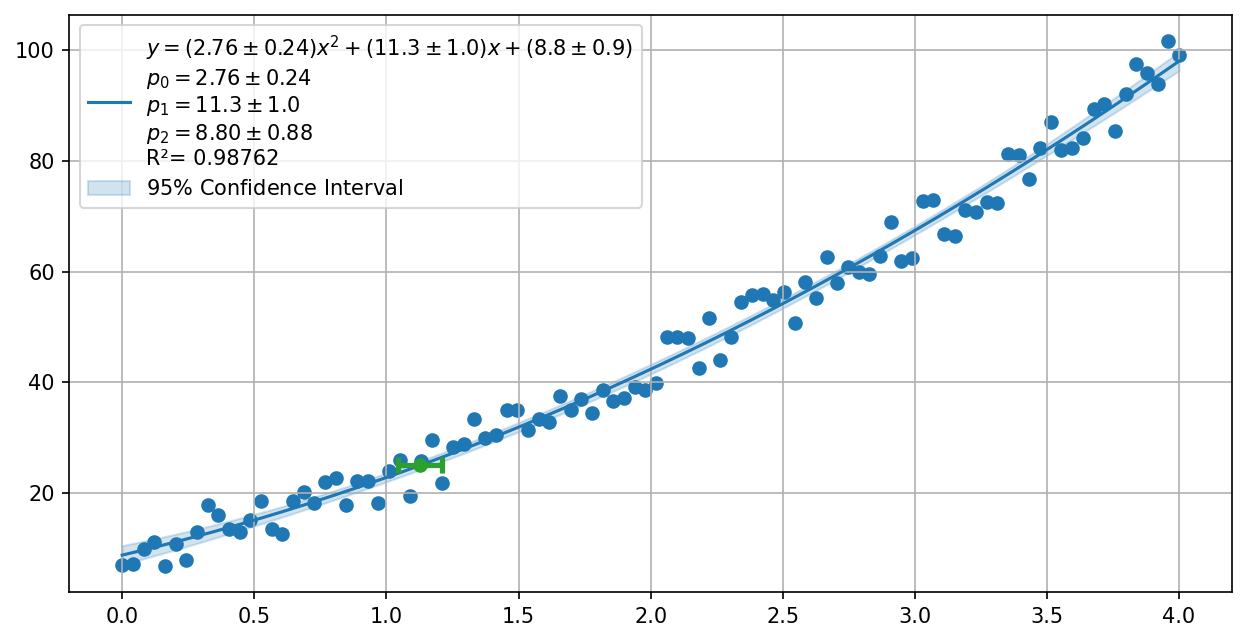

In [19]:
import uncertainties as unc
import matplotlib.pyplot as plt
import unc_tools.patches
from unc_tools import Poly

noise = np.random.uniform(low=-5, high=5, size= 100)
def f(x):
    return 3 * x **2 + 10 * x + 10 + noise
x = np.linspace(0,4,100) 
y = f(x) 

reg = UncRegression(x,y, func=Poly(2))
ax = reg.plot(show_band=True, show_coefficients=True)

y0 = 25
x0_1 = reg.find_x(y0)
x0_2 = reg.find_x(y0, x0 = 5)
print(f"y = {y0}: ",x0_1, x0_2)
ax.scatter([x0_1[1]],[y0])

y0 = unc.ufloat(25,0.01)
x0_1 = reg.find_x(y0)
x0_2 = reg.find_x(y0, x0 = 5)
print(f"y = {y0}: ",x0_1, x0_2)

In [8]:
import pandas as pd

df = pd.DataFrame({})

df["y"] = y 
x_ = reg.find_x(y)
df["x1"] = x_[:,0]
df["x2"] = x_[:,1]

df

,y,x1,x2
0,12.038734,-4.3+/-0.5,0.24+/-0.07
1,8.336754,-4.0+/-0.5,-0.08+/-0.08
2,7.530914,-3.9+/-0.5,-0.16+/-0.08
3,14.307760,-4.5+/-0.5,0.41+/-0.07
4,7.314911,-3.9+/-0.5,-0.18+/-0.08
...,...,...,...
95,92.162944,-7.9+/-0.5,3.81+/-0.16
96,89.487597,-7.8+/-0.5,3.72+/-0.15
97,96.405891,-8.0+/-0.5,3.94+/-0.16
98,95.297867,-8.0+/-0.5,3.90+/-0.16


<ErrorbarContainer object of 3 artists>

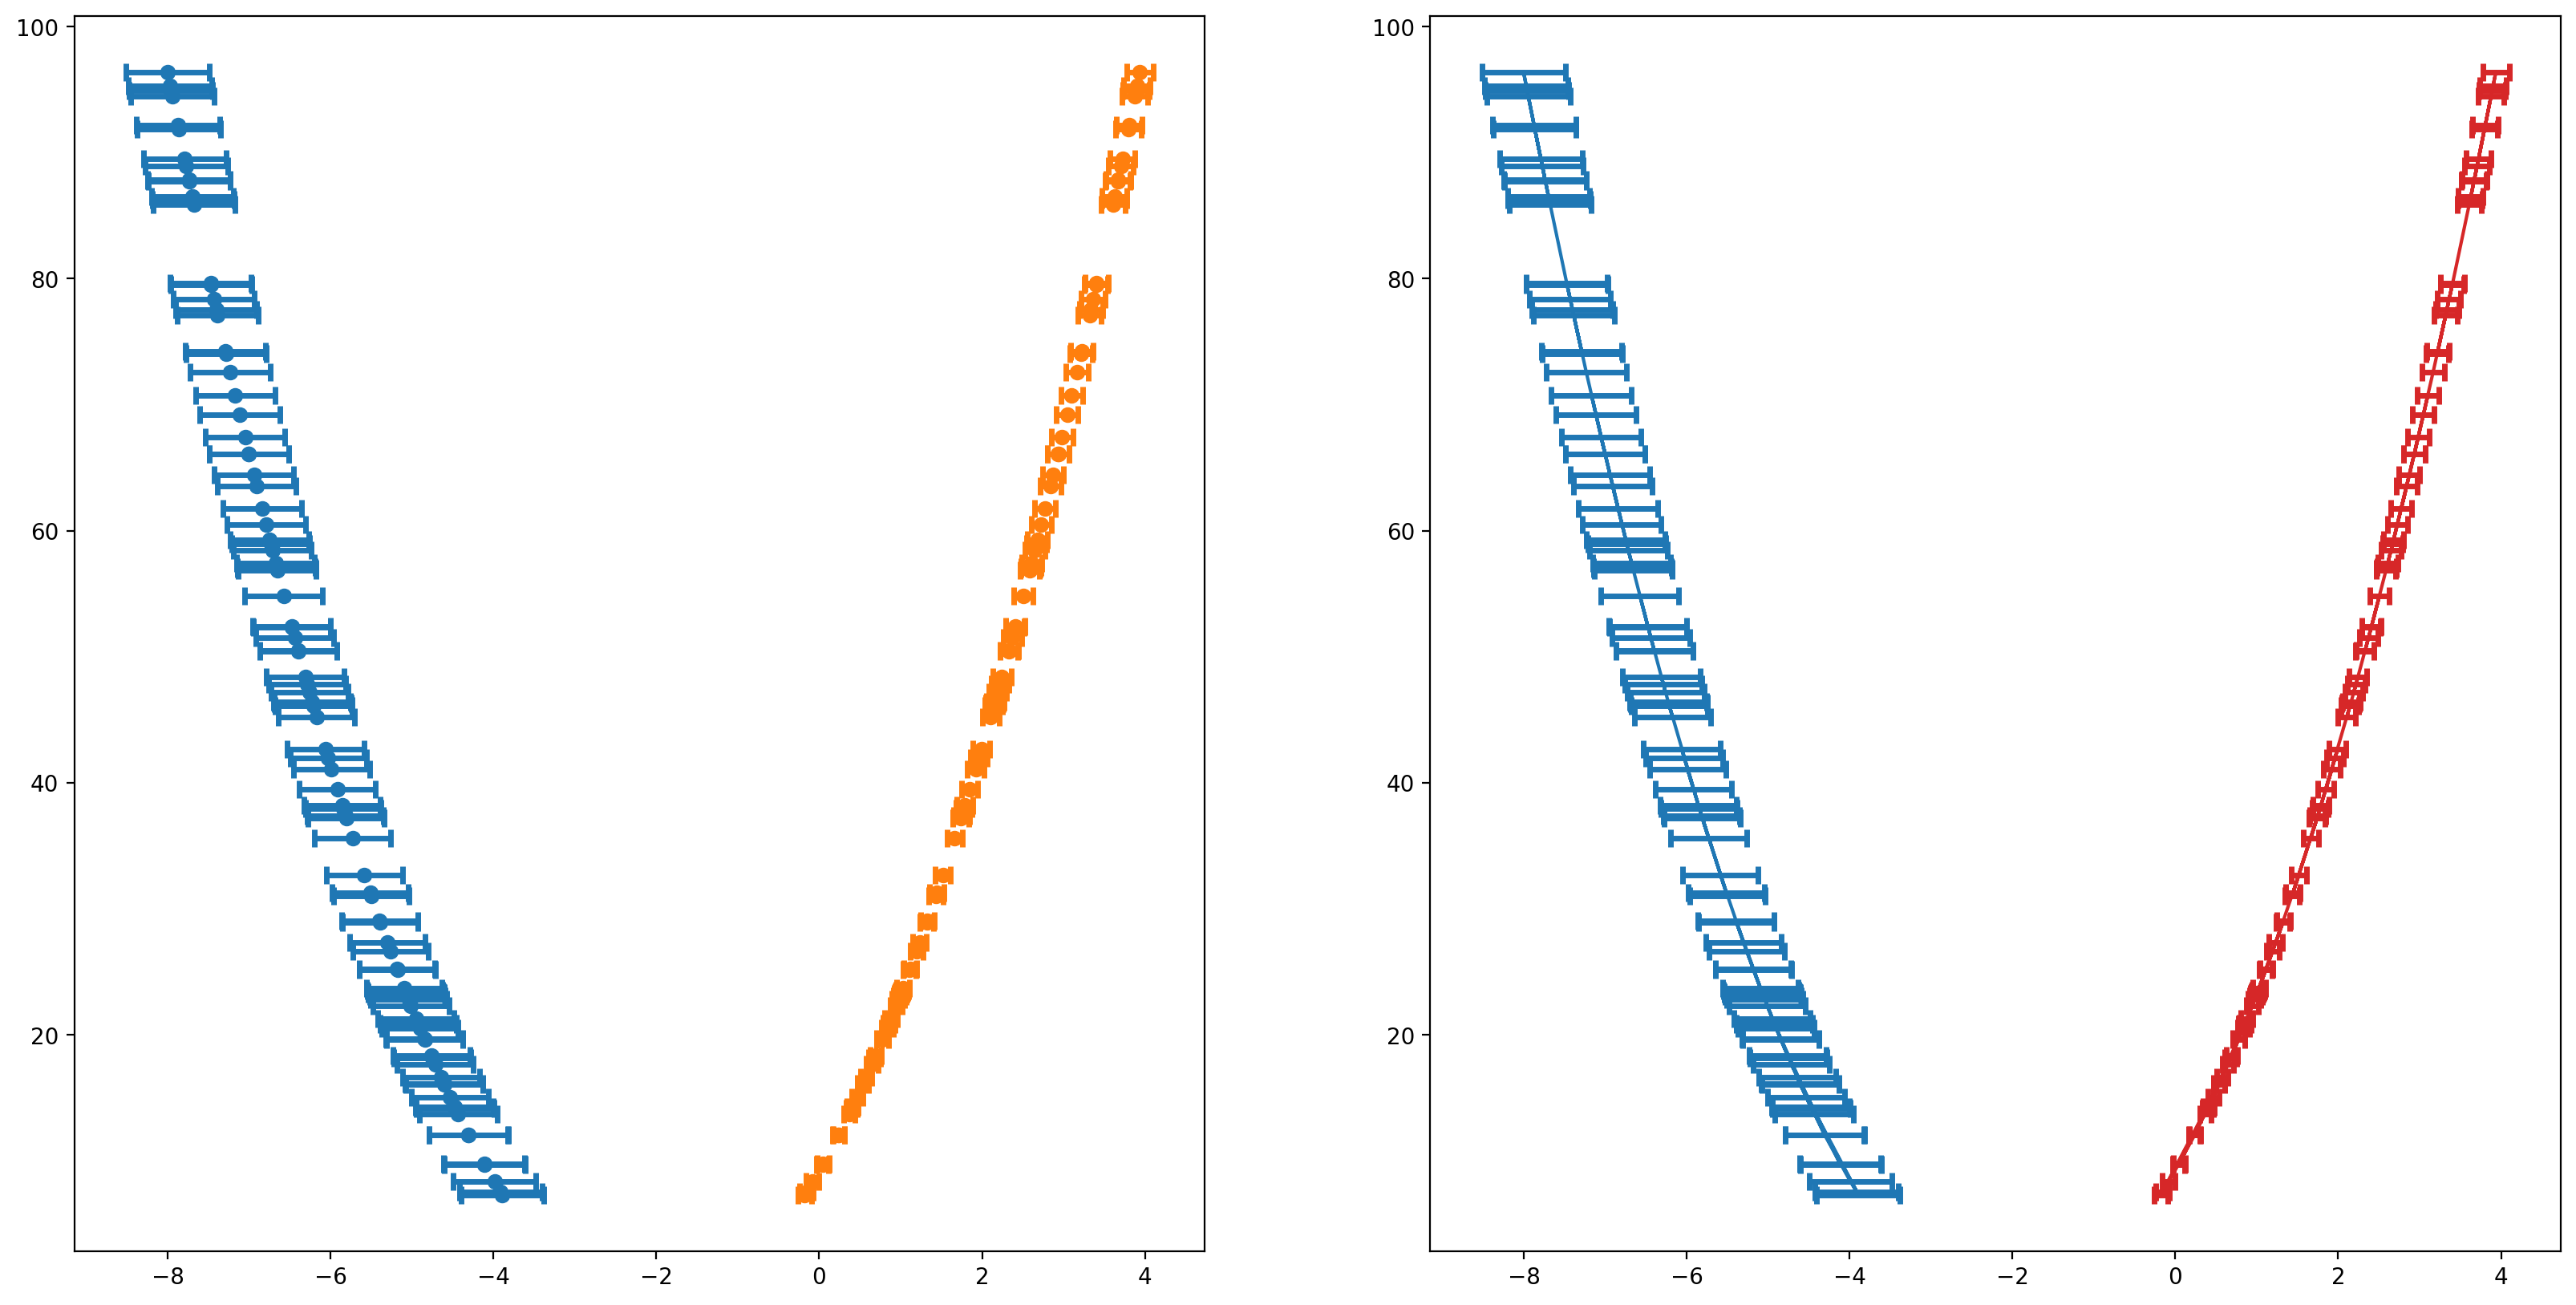

In [9]:
fig, axes = plt.subplots(1,2, figsize=(20,10), dpi=200)

axes[0].scatter(df.x1,df.y)
axes[0].scatter(df.x2,df.y)

axes[1].plot(df.x1,df.y)
axes[1].plot(df.x2,df.y)